In [ ]:
# pip install shap

  Using cached tqdm-4.67.1-py3-none-any.whl.metadata (57 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 23.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.9/3.9 MB 55.5 MB/s eta 0:00:00
Using cached tqdm-4.67.1-py3-none-any.whl (78 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.4/42.4 MB 67.6 MB/s eta 0:00:00:00:0100:01
Note: you may need to restart the kernel to use updated packages.


  0%|          | 0/1 [00:00<?, ?it/s]

SHAP values for input [1, 1]: [[1.5 2.5]]
Sum of SHAP values + baseline: 8.0


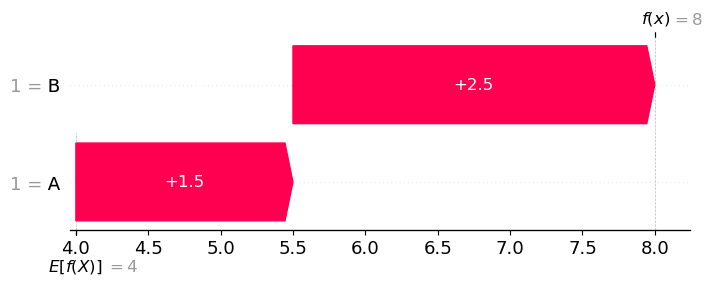

In [1]:
import shap
import numpy as np
import pandas as pd

# 1. Define the model
def model(X):
    A = X[:, 0]
    B = X[:, 1]
    return 3 * A + 5 * B

# 2. Define background dataset (4 possible combinations)
background = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]
])

# 3. Define input to explain
x_to_explain = np.array([[1, 1]])

# 4. Create SHAP KernelExplainer
explainer = shap.KernelExplainer(model, background)

# 5. Compute SHAP values
shap_values = explainer.shap_values(x_to_explain)

# 6. Print results
print("SHAP values for input [1, 1]:", shap_values)
print("Sum of SHAP values + baseline:", np.sum(shap_values) + explainer.expected_value)

# Optional: plot waterfall
shap.plots.waterfall(shap.Explanation(
    values=shap_values[0],
    base_values=explainer.expected_value,
    data=x_to_explain[0],
    feature_names=["A", "B"]
))
